# [Workshop] Analogical Reasoning using kNN

# 0. Installation

In [1]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install pandas

# 1. Import Library

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

# 2. Check Data

In [3]:
# Loading the dataset
# ASD_data = pd.read_csv('./data.csv')
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Print the first 5 rows of the dataframe.
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# Replace special 
for symbol in ['-','/',' ']:
    ASD_data.columns = ASD_data.columns.str.replace(symbol,'_')
    
ASD_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits_
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# observing the shape of the data
ASD_data.shape

(1054, 19)

# 3. Data Preprocessing

## 3.1. Feature Selection

In [6]:
ASD_data = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score'], axis=1)

ASD_data.shape

(1054, 16)

## 3.2. Encoding

In [7]:
numeric_data = ASD_data.select_dtypes(include=['int64'])
numeric_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons
0,0,0,0,0,0,0,1,1,0,1,28
1,1,1,0,0,0,1,1,0,0,0,36
2,1,0,0,0,0,0,1,1,0,1,36
3,1,1,1,1,1,1,1,1,1,1,24
4,1,1,0,1,1,1,1,1,1,1,20


In [8]:
categorical_data = ASD_data.select_dtypes(include=['object'])
categorical_data.head()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class_ASD_Traits_
0,f,middle eastern,yes,no,No
1,m,White European,yes,no,Yes
2,m,middle eastern,yes,no,Yes
3,m,Hispanic,no,no,Yes
4,f,White European,no,yes,Yes


In [9]:
l = []
for i in categorical_data.columns:
    data = pd.get_dummies(categorical_data[i]).iloc[:,:-1]
    data.columns = [i+"_"+j for j in data.columns]
    l.append(data)
l = pd.concat(l,axis=1)
l.head()

,Sex_f,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Jaundice_no,Family_mem_with_ASD_no,Class_ASD_Traits__No
0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [10]:
new_ASD_data = pd.concat([numeric_data,l],axis=1)
new_ASD_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Jaundice_no,Family_mem_with_ASD_no,Class_ASD_Traits__No
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
1,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0


In [11]:
new_ASD_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex_f', 'Ethnicity_Hispanic', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Jaundice_no',
       'Family_mem_with_ASD_no', 'Class_ASD_Traits__No'],
      dtype='object')

In [12]:
len(new_ASD_data.columns)

25

In [13]:
total=0
for i in ASD_data.columns:
    if(ASD_data[i].dtype=='O'):
        total += ASD_data[i].nunique()-1
    else:
        total += 1
total

25

## 3.3. Choose Independent (X) and Dependent (Y) Features

In [14]:
X = new_ASD_data.iloc[:,:-1]
Y = new_ASD_data.iloc[:,-1]

# 4. Build KNN Model

## 4.1 Split the dataset into training set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1 / 5, random_state=1,stratify=Y)
print(X_train.shape)
print(X_test.shape)

(843, 24)
(211, 24)


In [16]:
print(y_train.shape)
print(y_test.shape)

(843,)
(211,)


## 4.2. Feature Scaling

In [17]:
scaler = StandardScaler()
X_train['Age_Mons']= scaler.fit_transform(X_train[['Age_Mons']])

In [18]:
X_test['Age_Mons'] = scaler.transform(X_test[['Age_Mons']])

## 4.3. Build KNN Model (k=?)

In [19]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.963
Score in test set: 0.953


## 4.4. Hyperparameter Tuning

In [20]:
test_scores = []
train_scores = []

# Grid search and find the optimal parameter (N neighborhoods)
for i in range(2, 20):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)

    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))

# Print the best model index
max_train_score = max(train_scores)
print('The best k (train score) is', train_scores.index(max_train_score)+2)

max_test_score = max(test_scores)
print('The best k (test  score) is', test_scores.index(max_test_score)+2)

The best k (train score) is 2
The best k (test  score) is 15


In [21]:
for i in range(0, len(train_scores)):
    print('k = {0} - Train Accuracy = {1:.3f}'.format(i+2, train_scores[i]))

k = 2 - Train Accuracy = 0.975
k = 3 - Train Accuracy = 0.967
k = 4 - Train Accuracy = 0.972
k = 5 - Train Accuracy = 0.963
k = 6 - Train Accuracy = 0.969
k = 7 - Train Accuracy = 0.966
k = 8 - Train Accuracy = 0.975
k = 9 - Train Accuracy = 0.966
k = 10 - Train Accuracy = 0.968
k = 11 - Train Accuracy = 0.962
k = 12 - Train Accuracy = 0.963
k = 13 - Train Accuracy = 0.963
k = 14 - Train Accuracy = 0.968
k = 15 - Train Accuracy = 0.969
k = 16 - Train Accuracy = 0.968
k = 17 - Train Accuracy = 0.963
k = 18 - Train Accuracy = 0.967
k = 19 - Train Accuracy = 0.963


In [22]:
for i in range(0, len(test_scores)):
    print('k = {0} - Test Accuracy = {1:.3f}'.format(i+2, test_scores[i]))

k = 2 - Test Accuracy = 0.938
k = 3 - Test Accuracy = 0.929
k = 4 - Test Accuracy = 0.943
k = 5 - Test Accuracy = 0.953
k = 6 - Test Accuracy = 0.953
k = 7 - Test Accuracy = 0.957
k = 8 - Test Accuracy = 0.953
k = 9 - Test Accuracy = 0.948
k = 10 - Test Accuracy = 0.957
k = 11 - Test Accuracy = 0.962
k = 12 - Test Accuracy = 0.967
k = 13 - Test Accuracy = 0.957
k = 14 - Test Accuracy = 0.962
k = 15 - Test Accuracy = 0.972
k = 16 - Test Accuracy = 0.972
k = 17 - Test Accuracy = 0.972
k = 18 - Test Accuracy = 0.967
k = 19 - Test Accuracy = 0.967


In [23]:
knn_classifier=KNeighborsClassifier(n_neighbors=3) # k = 3
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.967
Score in test set: 0.929


In [24]:
knn_classifier=KNeighborsClassifier(n_neighbors=17) # k = 17
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.963
Score in test set: 0.972


# 5. Visualize the performance

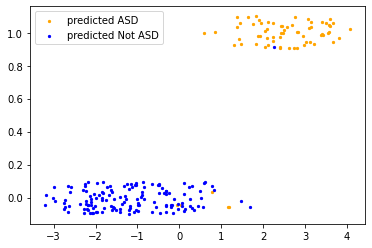

In [25]:
# Visualize the result of KNN with LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)

X_new = lda.fit_transform(X_test, y_test)

y_test_new = y_test.apply(lambda x:x + np.random.uniform(-0.1,0.1))

plt.scatter(X_new[knn_classifier.predict(X_test) == 1], y_test_new[knn_classifier.predict(X_test) == 1], marker='o', c='orange', s=5)
plt.scatter(X_new[knn_classifier.predict(X_test) == 0], y_test_new[knn_classifier.predict(X_test) == 0], marker='o', c='blue', s=5)

plt.legend(['predicted ASD', 'predicted Not ASD'], loc='best')
plt.show()

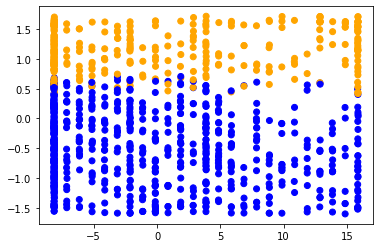

In [26]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
color = []
for y in Y:
    color.append('orange' if y == 1 else 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=color) # Orange: ASD; Blue Not ASD;
plt.show()